# Лабораторная работа №3. Синтез БИХ-фильтров




In [607]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [608]:
def plot_zero_pole_diagram(z, p):
    plt.figure(figsize=[3, 3], dpi=120)

    q = np.linspace(0, 2*np.pi, 401)
    plt.plot(np.cos(q), np.sin(q), 'k--')

    plt.plot(z.real, z.imag, 'ro', label='Нули')
    plt.plot(p.real, p.imag, 'bx', label='Полюса')
    plt.grid()
    plt.axis('image')
    plt.axis([-1.1, 1.1, -1.1, 1.1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
    plt.title("Нуль-полюсная диаграмма")
    plt.xlabel("Re $z$")
    plt.ylabel("Im $z$")
    plt.show()

def plot_impulse(t, h):
    plt.figure(figsize=[8, 3], dpi=110)
    plt.stem(t, np.squeeze(h))
    plt.xlabel("$k$")
    plt.ylabel("$h[k]$")
    plt.title("Импульсная характеристика")
    plt.grid()
    plt.show()

def plot_impulse_a(t, h):
    plt.figure(figsize=[8, 3], dpi=110)
    plt.stem(t, h)
    plt.xlabel("$k$")
    plt.ylabel("$h_a[k]$")
    plt.title("Импульсная характеристика")
    plt.grid()
    plt.show()

def plot_step(t, g):
    plt.figure(figsize=[8, 3], dpi=110)
    plt.stem(t, np.squeeze(g))
    plt.xlabel("$k$")
    plt.ylabel("$g[k]$")
    plt.title("Переходная характеристика")
    plt.grid()
    plt.show()

def plot_step_a(t, g):
    plt.figure(figsize=[8, 3], dpi=110)
    plt.stem(t, g)
    plt.xlabel("$k$")
    plt.ylabel("$g_a[k]$")
    plt.title("Переходная характеристика")
    plt.grid()
    plt.show()

def plot_frequency_response(theta, H, lim = 0.5):
    plt.figure(figsize=[8, 3], dpi=110)
    plt.plot(theta/(2*np.pi), abs(H))
    plt.xlabel("$\\nu$")
    plt.ylabel("$|H(\\nu)|$")
    plt.title("АЧХ фильтра")
    plt.xlim([-lim, lim])
    plt.xticks(np.linspace(-lim, lim, 11))
    plt.grid()
    plt.show()

    plt.figure(figsize=[8, 3], dpi=110)
    plt.plot(theta/(2*np.pi), np.angle(H))
    plt.xlabel("$\\nu$")
    plt.ylabel("$\\angle H(\\nu)$")
    plt.title("ФЧХ фильтра")
    plt.xlim([-lim, lim])
    plt.xticks(np.linspace(-lim, lim, 11))
    plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))
    plt.grid()
    plt.show()


## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |     $7$ |    $8$ |    $9$ |    $10$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ | $0.3$ | $0.15$ | $0.35$ | $0.4$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |  $—$ | $—$ | $—$ | $—$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

Цифровой резонатор:

$$ H(z) = \frac{G_0 z^2}{(z - \alpha e^{-j 2 \pi \nu_0})(z - \alpha e^{j 2 \pi \nu_0})} = \frac{G_0}{1 - 2\alpha \cos(2 \pi \nu_0) z^{-1} + \alpha^2 z^{-2}}$$

$$|H(z = \alpha e^{\pm j 2 \pi \nu_0})| = 1$$ 
$$ |G_0| = |1 - 2\alpha \cos(2 \pi \nu_0) e^{j 2 \pi \nu_0} + \alpha^2 e^{j 4 \pi \nu_0}| = (1-\alpha)|1-\alpha e^{j 4 \pi \nu_0}|$$

Вычисление обратного z–преобразования с использованием таблицы соответствий:
$$ h[k] = \alpha^k \frac{sin((k + 1)(2 \pi \nu_0))}{sin(2 \pi \nu_0)} G_0 u[k] $$

$$ G(z) = H(z)U(z) = \frac{G_0}{1 - 2\alpha \cos(2 \pi \nu_0) z^{-1} + \alpha^2 z^{-2}} \frac{1}{1 - z^{-1}} $$

$$ g[k] = \left[ G_0 \frac{z^{k+2}}{(z - \alpha e^{-j 2 \pi \nu_0})(z - \alpha e^{j 2 \pi \nu_0})} \right]_{z=1} + \left[  G_0 \frac{z^{k+2}}{(z - \alpha e^{-j 2 \pi \nu_0})(z - 1)} \right]_{z= \alpha e^{j 2 \pi \nu_0}} + \left[  G_0 \frac{z^{k+2}}{(z - 1)(z - \alpha e^{j 2 \pi \nu_0})}\right]_{z= \alpha e^{-j 2 \pi \nu_0}}, ~k \ge 0 $$

$$ g[k] = G_0 \frac{1}{1 - 2 \alpha \cos(2 \pi \nu_0) + \alpha^2} - G_0 \frac{j \alpha^{k + 1} e^{j 2 \pi \nu_0 (k + 2)}}{2 sin(2 \pi \nu_0)(\alpha e^{j 2 \pi \nu_0} - 1)} + G_0 \frac{j \alpha^{k + 1} e^{-j 2 \pi \nu_0 (k + 2)}}{2 sin(2 \pi \nu_0)(\alpha e^{-  j 2 \pi \nu_0} - 1)}, k \ge 0 $$

[] [-0.72811529+0.52900673j -0.72811529-0.52900673j] 0.11197184512747364
[] [-0.72811529+0.52900673j -0.72811529-0.52900673j] 0.11197184512747364


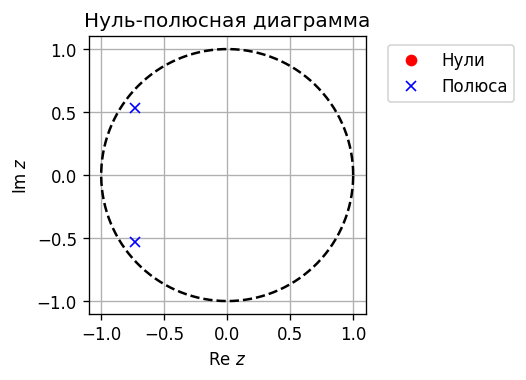

In [609]:
nu_0 = 0.4
alpha = 0.9
G0 = (1 - alpha) * abs(1 - alpha * np.exp(1j * 4 * np.pi * nu_0))

betas=np.array([G0])
alphas=np.array([1, -2 * alpha * np.cos(2 * np.pi * nu_0), alpha ** 2])

z, p, k = signal.tf2zpk(b=betas, a=alphas)
print(z, p, k)

z = np.array([])
p = np.array([alpha * np.exp(1j * 2 * np.pi * nu_0), alpha * np.exp(-1j * 2 * np.pi * nu_0)])
k = G0
print(z, p, k)

plot_zero_pole_diagram(z, p)


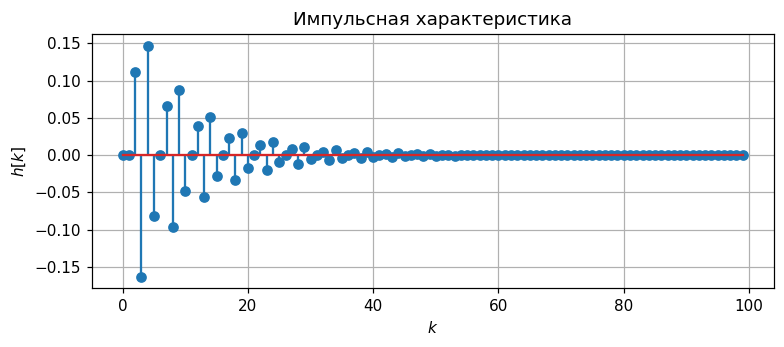

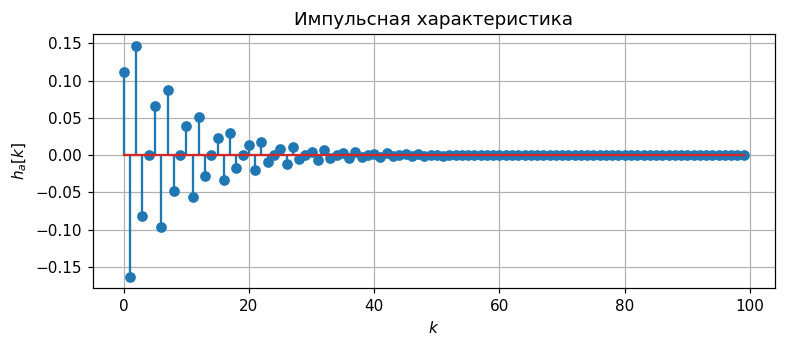

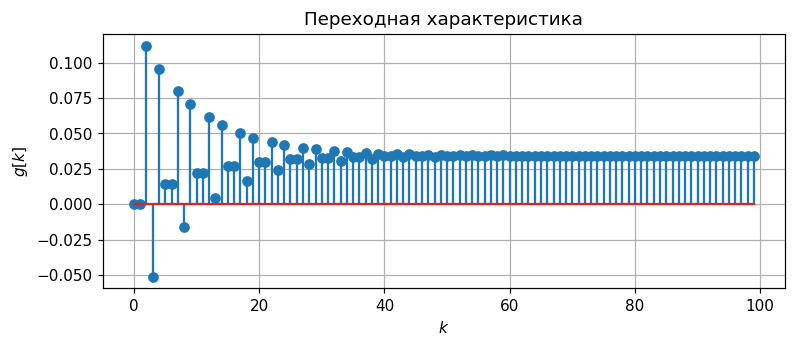

/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_73915/1626638273.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  g = np.asarray(g, float)


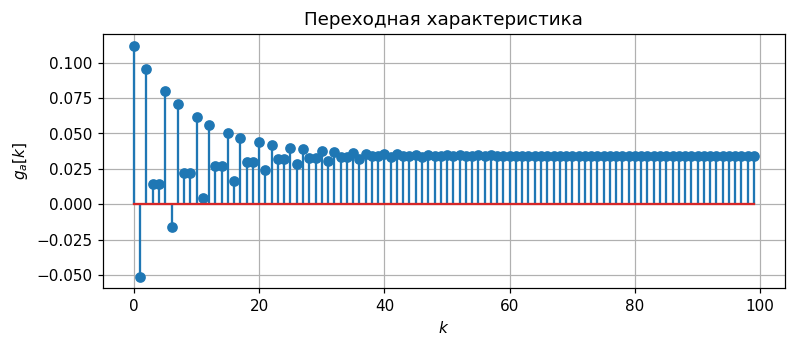

In [610]:
system = signal.dlti(z, p, k, dt=1)

t1, h = system.impulse()
t2, g = system.step()

k = np.arange(len(t1))

plot_impulse(t1, h)

h = alpha ** k * np.sin((k + 1) * (2 * np.pi * nu_0)) / np.sin(2 * np.pi * nu_0) * G0
plot_impulse_a(t1, h)

plot_step(t2, g)

g = G0 / (1 - 2 * alpha * np.cos(2 * np.pi * nu_0) + alpha ** 2) \
    - G0 * (1j * alpha ** (k + 1) * np.exp(1j * (k + 2) * (2 * np.pi * nu_0))) / (2 * np.sin(2 * np.pi * nu_0) * (alpha * np.exp(1j * 2 * np.pi * nu_0) - 1)) \
    + G0 * (1j * alpha ** (k + 1) * np.exp(-1j * (k + 2) * (2 * np.pi * nu_0))) / (2 * np.sin(2 * np.pi * nu_0) * (alpha * np.exp(-1j * 2 * np.pi * nu_0) - 1))
g = np.asarray(g, float)

plot_step_a(t2, g)


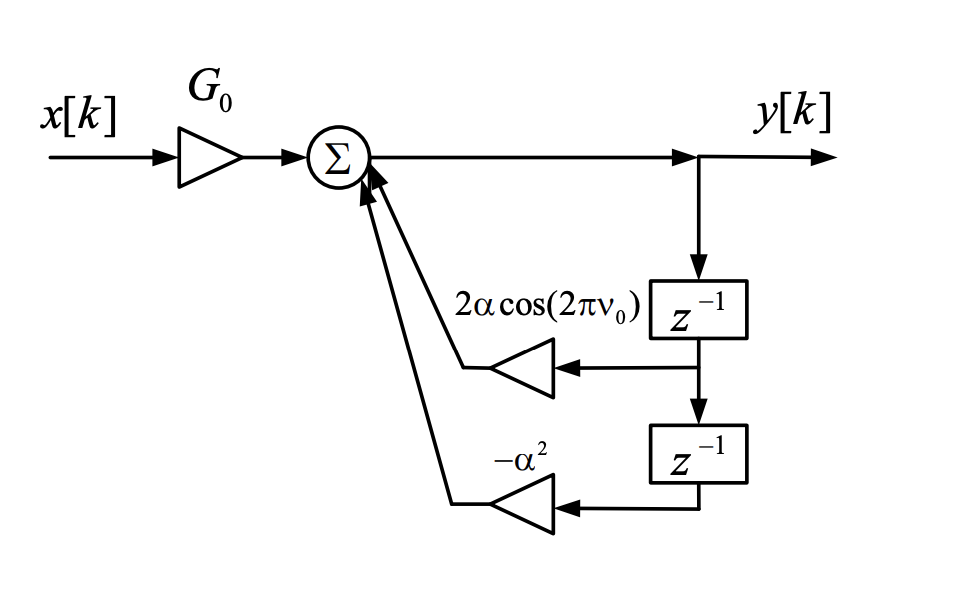

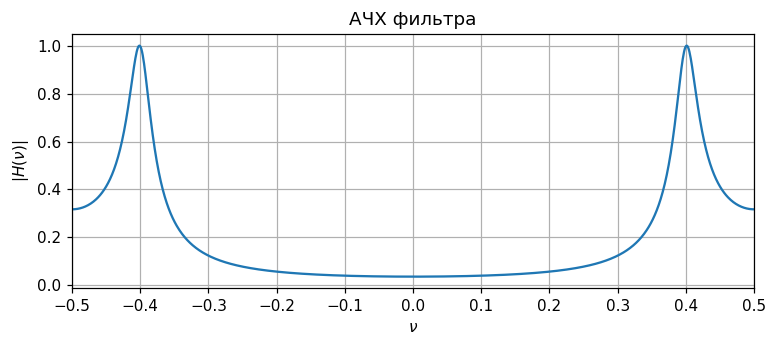

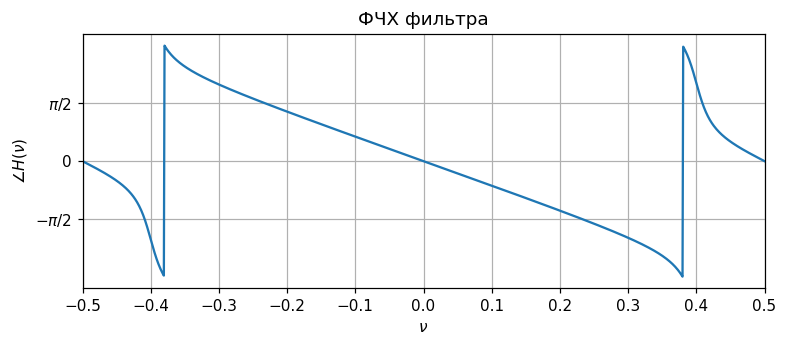

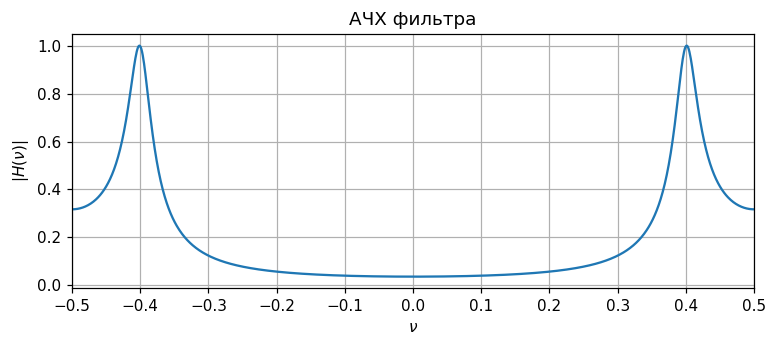

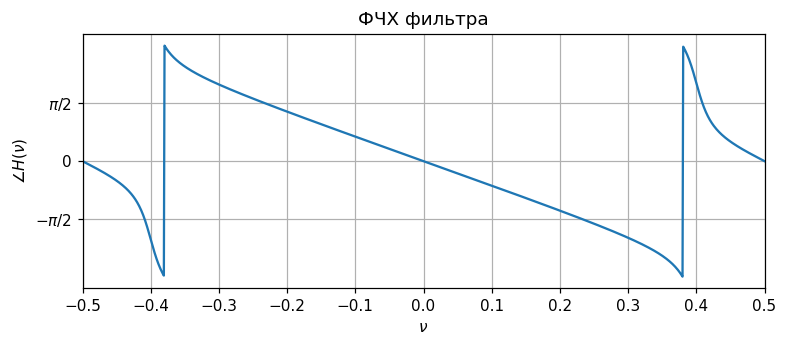

In [611]:
theta=np.linspace(-np.pi, np.pi, 1024)
w, H = system.freqresp(w = theta)

plot_frequency_response(w, H)

theta=np.linspace(-np.pi, np.pi, 1024)
H = G0 * np.exp(-1j * 2 * w) / (1 - 2 * alpha * np.cos(2 * np.pi * nu_0) * np.exp(-1j * w) + alpha**2 * np.exp(-1j * 2 * w))
plot_frequency_response(w, H)


### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |  
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 | 250 | 500| 600 | 350 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 | 1000 | 2000 | 2000 | 2000 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


$$H(z)={{G}_{0}}\frac{\left( 1-\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}{\left( 1-A\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-A\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}$$

In [612]:
theta_0 = np.pi/4
A = 0.9
G0 = abs(1 - 2 * A * np.cos(theta_0) + A ** 2) / abs (2 - 2 * np.cos(theta_0))


In [613]:
z = np.array([np.exp(1j * theta_0), np.exp(-1j * theta_0)])
p = A * z
k = G0


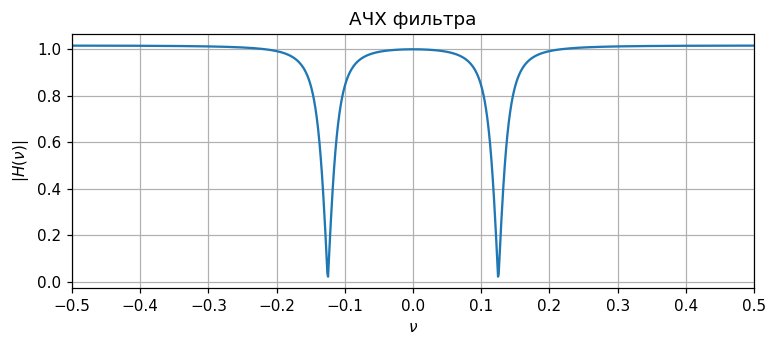

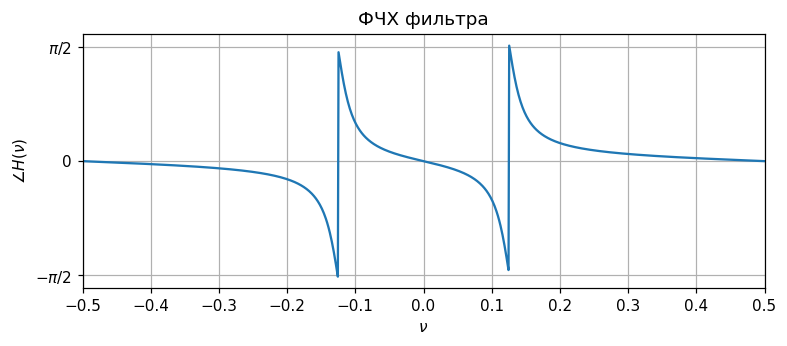

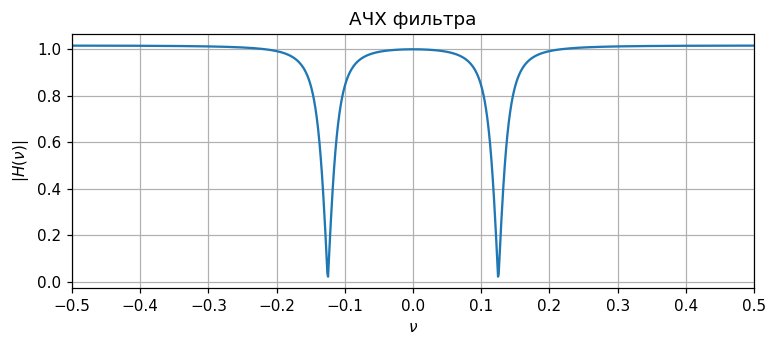

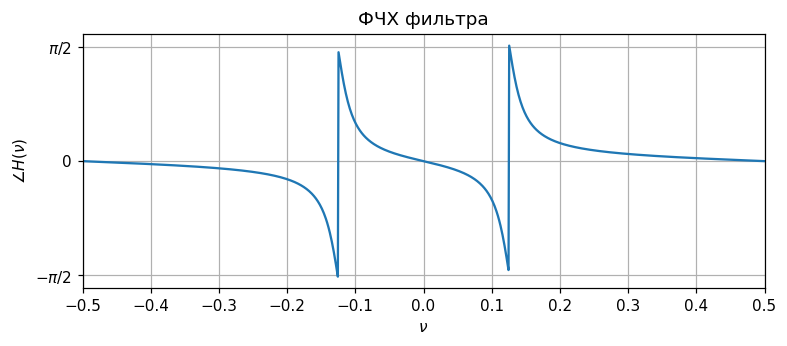

In [614]:
system = signal.dlti(z, p, k, dt = 1)

theta=np.linspace(-np.pi, np.pi, 1024)
w, H = system.freqresp(w = theta)

plot_frequency_response(w, H)

theta=np.linspace(-np.pi, np.pi, 1024)
H = G0 * (np.exp(1j * w) - np.exp(-1j * theta_0))     \
       * (np.exp(1j * w) - np.exp(+1j * theta_0))     \
       / (np.exp(1j * w) - A * np.exp(-1j * theta_0)) \
       / (np.exp(1j * w) - A * np.exp(+1j * theta_0))

plot_frequency_response(w, H)


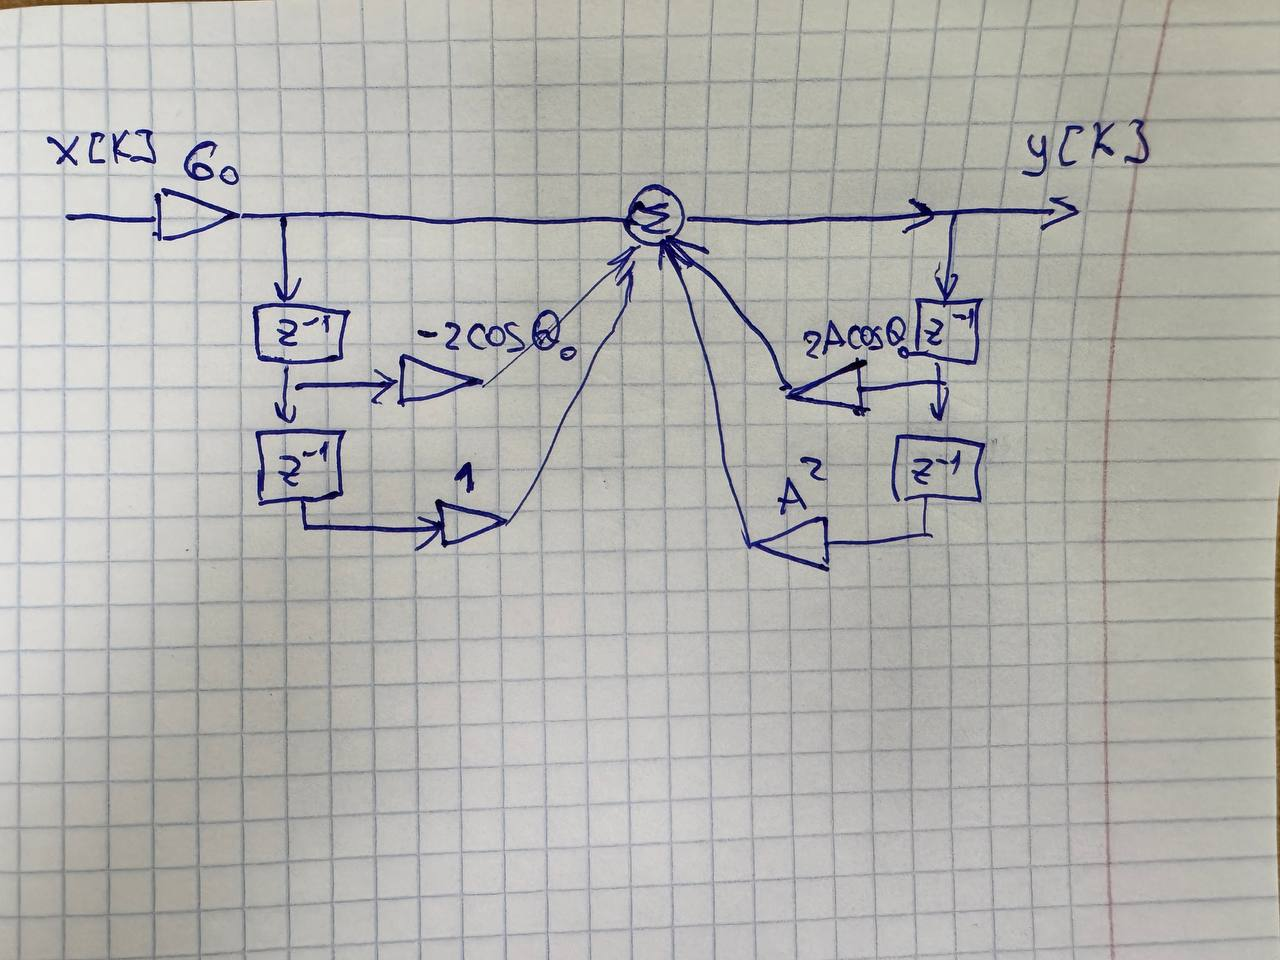

## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_{max}$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_{min}$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_{max}$,
* минимальное допустимое затухание в полосе задерживания $a_{min}$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


In [615]:
fs = 6800
wp = 1040
ws = 1380
gpass = 0.4455
gstop = 40

delta1 = 1 - 10 ** (-gpass / 20)
delta2 = 10 ** (-gstop / 20)

print(delta1, delta2)


0.04999694912604835 0.01


In [616]:
def plot_freq_response_filter(Wn, beta, alpha):
    f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

    plt.figure(figsize=[8, 3], dpi=120)
    plt.plot(f, (abs(H)))
    plt.xlim([-fs/2, fs/2])
    plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
    plt.xlabel("$f$, Гц")
    plt.ylabel("$|H(f)|$")
    plt.fill([-wp,-wp, wp, wp], [0, 1-delta1, 1-delta1, 0], '0.9', lw=0)
    plt.fill([-fs,-fs, -ws, -ws], [delta2, 1, 1, delta2], '0.9', lw=0)
    plt.fill([fs,fs, ws, ws], [delta2, 1, 1, delta2], '0.9', lw=0)

    plt.grid()
    plt.show()

    plt.figure(figsize=[8, 5], dpi=120)
    plt.plot(f, 20*np.log10(abs(H)))
    plt.xticks([-Wn, 0, wp, ws])

    plt.yticks([-gstop, -3, -gpass])

    plt.xlim([-3500, 3500])
    plt.ylim([-50, 1])
    plt.xlabel("$f$, Гц")
    plt.ylabel("$20 \lg|H(f)|$")
    plt.grid()
    plt.show()


17 1099.1401598853224 [1.36621050e-07 2.32255786e-06 1.85804629e-05 9.29023143e-05
 3.25158100e-04 8.45411060e-04 1.69082212e-03 2.65700619e-03
 3.32125774e-03 3.32125774e-03 2.65700619e-03 1.69082212e-03
 8.45411060e-04 3.25158100e-04 9.29023143e-05 1.85804629e-05
 2.32255786e-06 1.36621050e-07] [ 1.00000000e+00 -6.00172299e+00  1.87014894e+01 -3.89630593e+01
  5.99617506e+01 -7.16763373e+01  6.84793830e+01 -5.31567587e+01
  3.38148720e+01 -1.76757976e+01  7.57354434e+00 -2.63931585e+00
  7.37625067e-01 -1.61606695e-01  2.67689146e-02 -3.15523126e-03
  2.36041512e-04 -8.43057272e-06]


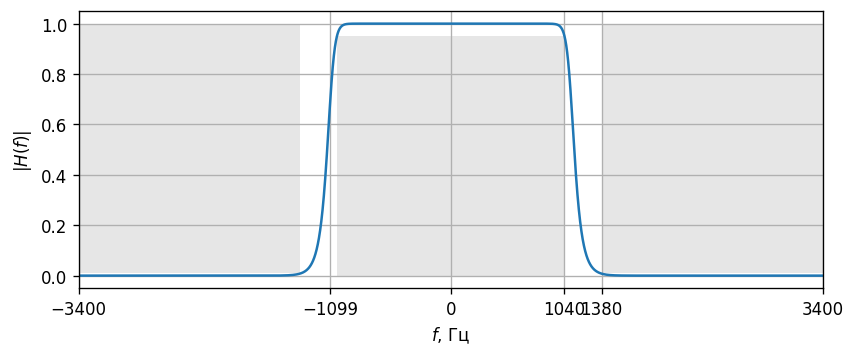

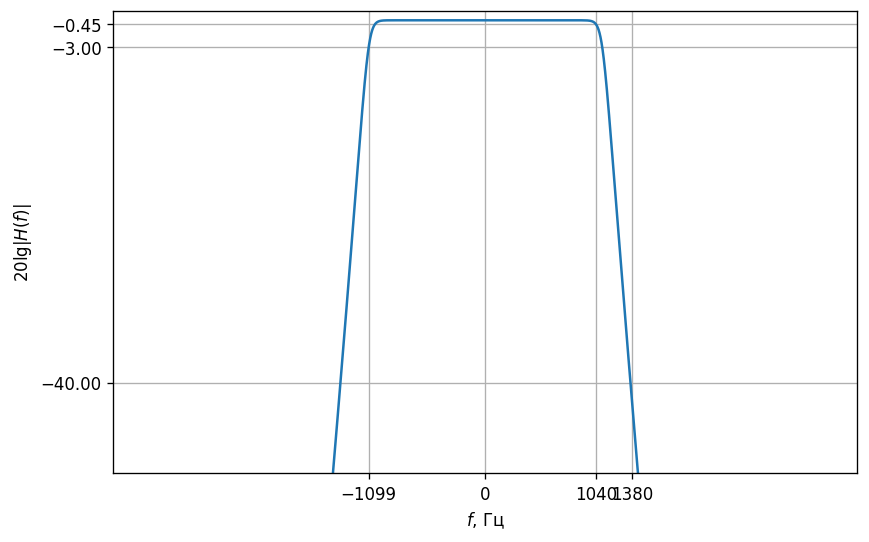

In [617]:
N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)

print(N, Wn, beta, alpha)

plot_freq_response_filter(Wn, beta, alpha)


8 1040.0 [4.47395525e-05 3.57916420e-04 1.25270747e-03 2.50541494e-03
 3.13176868e-03 2.50541494e-03 1.25270747e-03 3.57916420e-04
 4.47395525e-05] [  1.          -5.22434931  13.22008031 -20.76657993  21.95877217
 -15.93358981   7.73504178  -2.29870857   0.32138944]


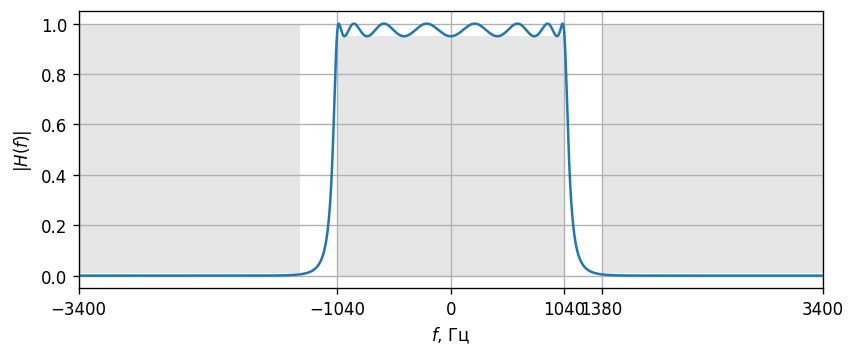

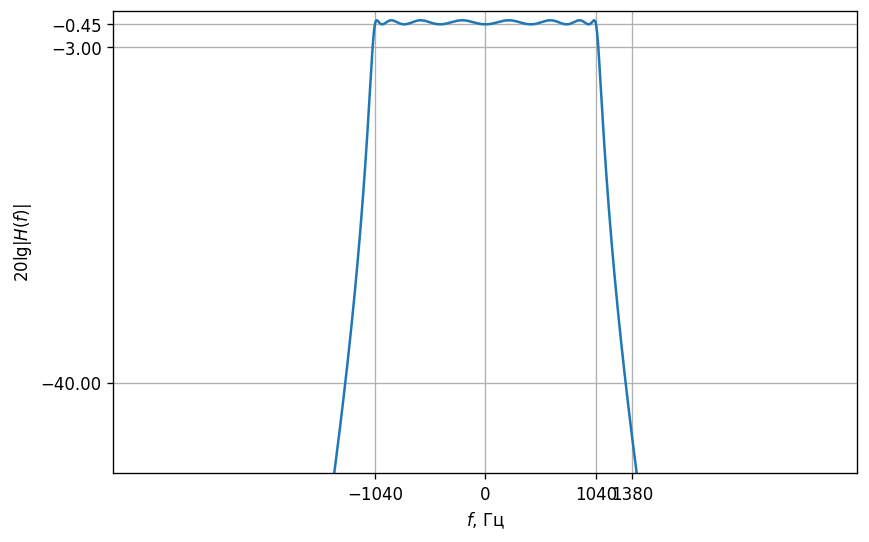

In [618]:
N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)

print(N, Wn, beta, alpha)

plot_freq_response_filter(Wn, beta, alpha)


8 1318.6225136676048 [0.03473906 0.04011887 0.09828357 0.11073525 0.13314803 0.11073525
 0.09828357 0.04011887 0.03473906] [ 1.00000000e+00 -1.91588634e+00  2.74510959e+00 -2.12320872e+00
  1.33115301e+00 -4.69385113e-01  1.45784121e-01 -1.53217653e-02
  2.65675144e-03]


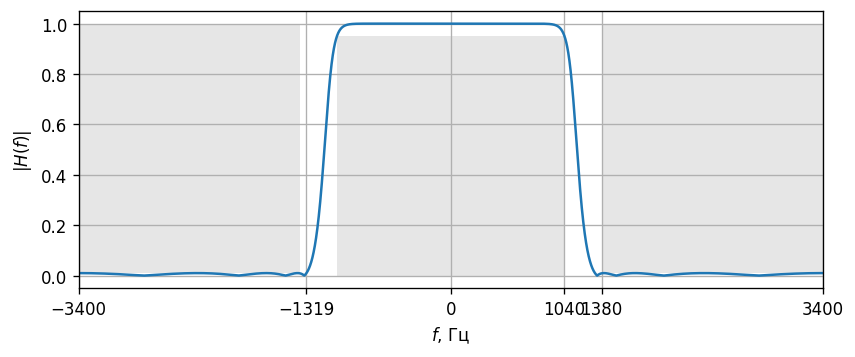

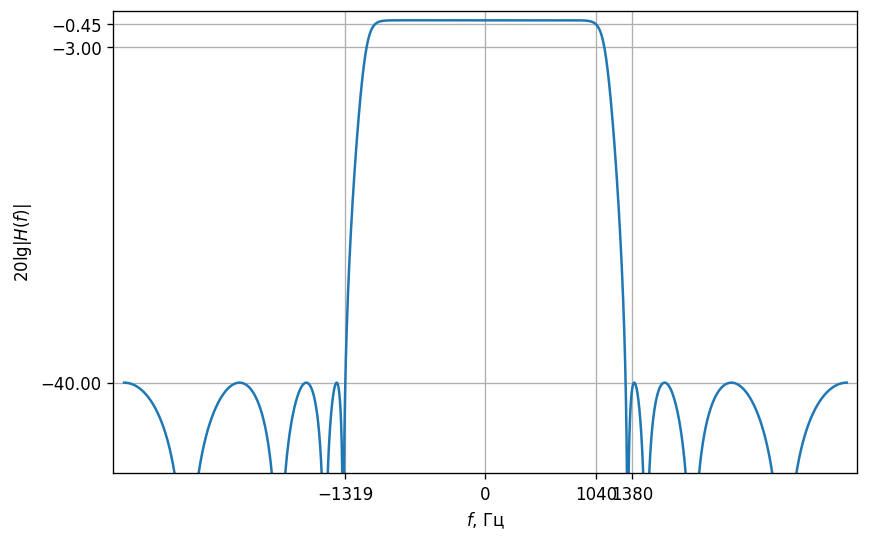

In [619]:
N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)

print(N, Wn, beta, alpha)

plot_freq_response_filter(Wn, beta, alpha)


5 1040.0 [0.03136131 0.00843672 0.04024018 0.04024018 0.00843672 0.03136131] [ 1.         -2.77812699  3.98093515 -3.23279724  1.50831756 -0.31825207]


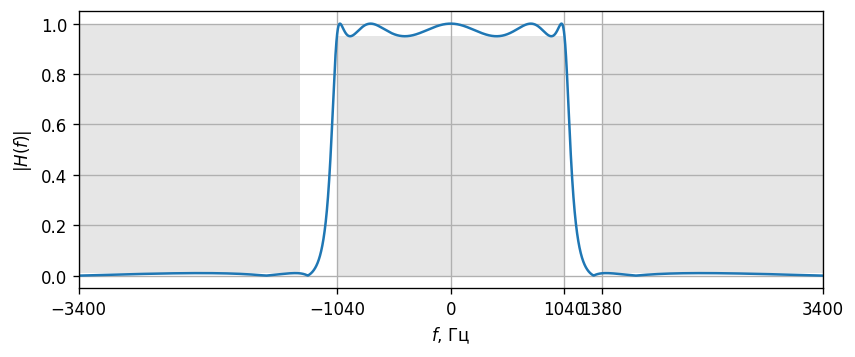

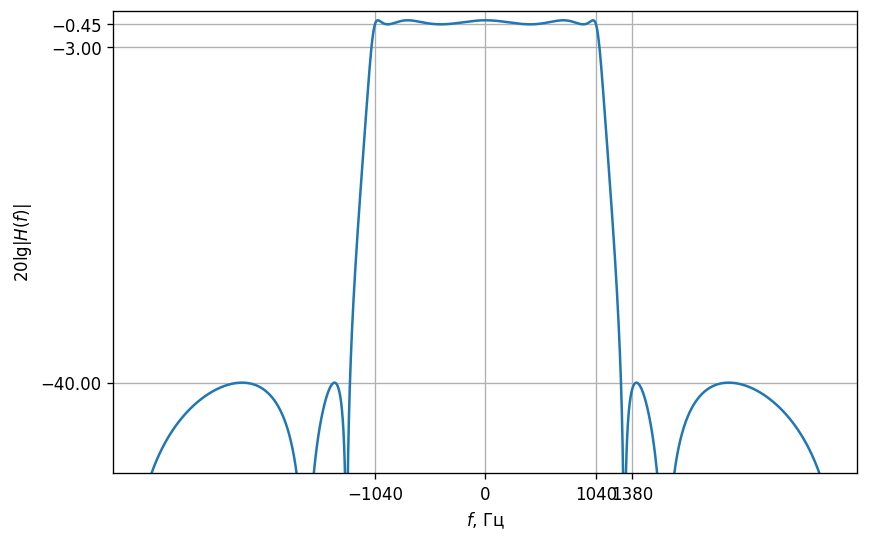

In [620]:
N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)

print(N, Wn, beta, alpha)

plot_freq_response_filter(Wn, beta, alpha)


In [621]:
signal.tf2sos(beta, alpha)


array([[ 0.03136131,  0.03136131,  0.        ,  1.        , -0.59699546,
         0.        ],
       [ 1.        , -0.01982472,  1.        ,  1.        , -1.11857472,
         0.59637069],
       [ 1.        , -0.7111584 ,  1.        ,  1.        , -1.06255681,
         0.89388966]])

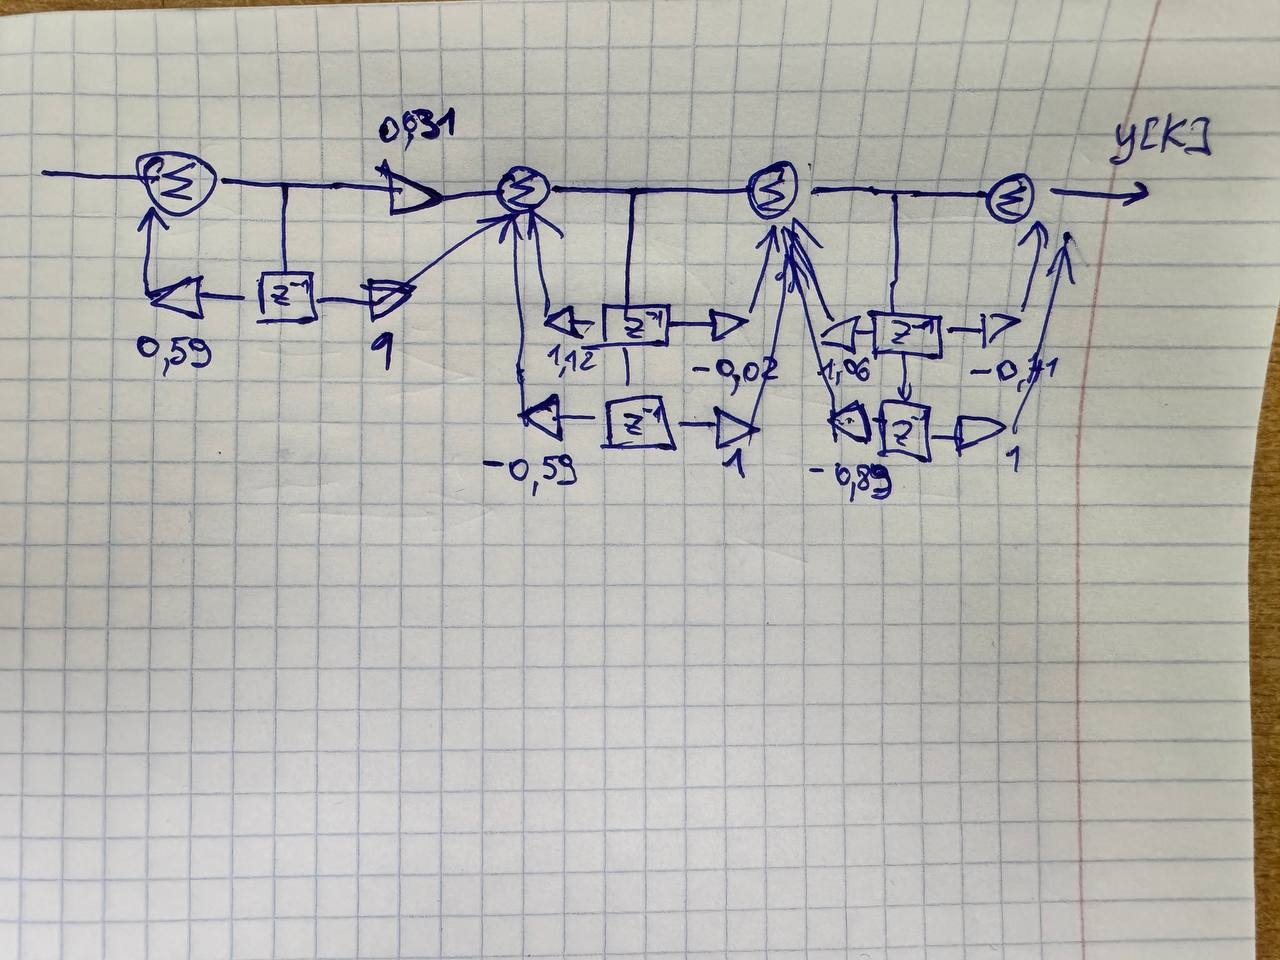

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

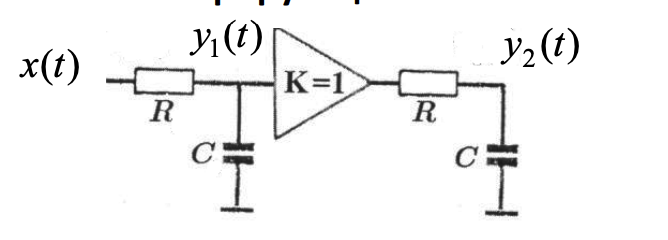

$$ RC \frac{dy}{dt} + y_1(t) = x(t), y(0) = 0 $$

$$ RC pY_1(p) + Y(p) = X(p) $$

$$ H_1(p) = \frac{Y(p)}{X(p)} = \frac{1}{1 + RCp} $$

$$ H_2(p) = H_1(p) H_1(p) = \frac{1}{(RC)^2 p^2 + 2RC p + 1} $$

$$ p = \frac{2}{\Delta t} \frac{1 - z^{-1}}{1 + z^{-1}}$$

$$ H(z) = \frac{1}{(RC)^2 \left( \cfrac{1 - z^{-1}}{1 + z^{-1}} \right)^2 + 2 RC \left(  \cfrac{1 - z^{-1}}{1 + z^{-1}}\right) + 1} $$

$$ H(z) = \frac{1 + 2z^{-1} + z^{-2}}{4(RC/\Delta t)^2 (1 - 2z^{-1} + z^{-2}) + 4(RC/\Delta t)(1 - z^{-2}) + (1 + 2z^{-1} + z^{-2})} $$

$$ \alpha = \frac{RC}{\Delta t} $$

$$ H(z) = \frac{1 + 2z^{-1} + z^{-2}}{(4 \alpha^2 + 4 \alpha + 1) + (2 - 8 \alpha^2) z^{-1} + (4 \alpha^2 - 4 \alpha + 1) z^{-2}} $$

$$ \beta = \frac{2 \alpha - 1}{2 \alpha + 1} $$ 

$$ y[k] = \frac{x[k] + x[k-1] + x[k-2]}{(2 \alpha + 1 ) ^ 2} + 2 \beta y[k-1] - \beta^2 y[k-2]$$


In [622]:
RC = 2*1e-4
dt = RC/8


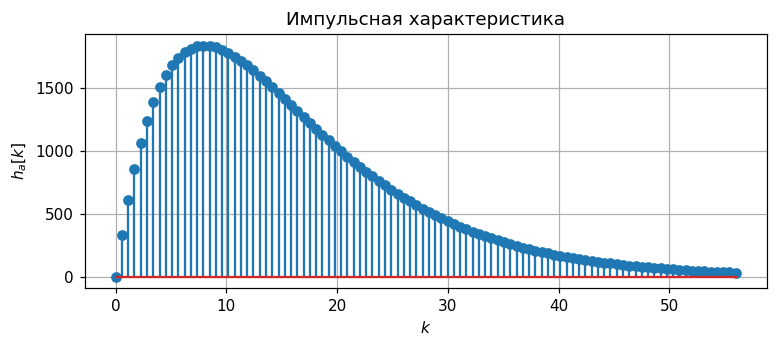

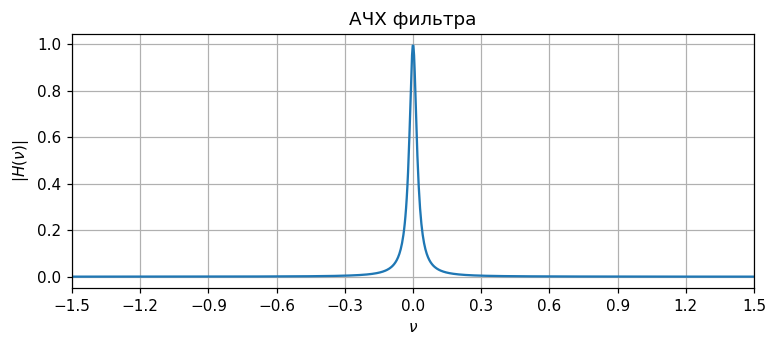

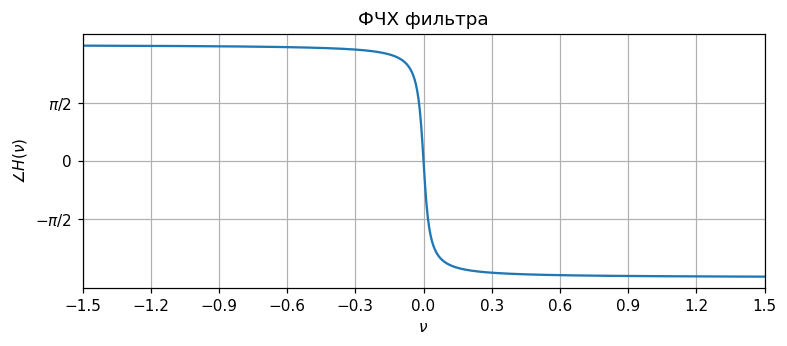

In [623]:
betas = np.array([1])
alphas = np.array([RC**2, 2*RC, 1])

lti_2RC = signal.lti(betas, alphas)

t, h = lti_2RC.impulse()
plot_impulse_a(t / dt, h)

theta = np.linspace(-3 * np.pi, 3 * np.pi, 1024) / dt
w, H = lti_2RC.freqresp(w = theta)

plot_frequency_response(w * dt, H, lim = 1.5)


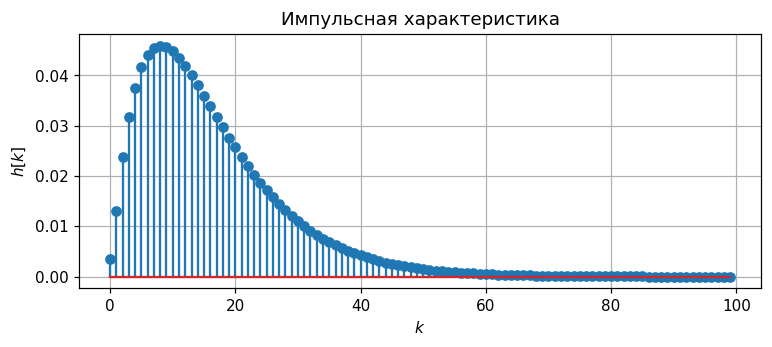

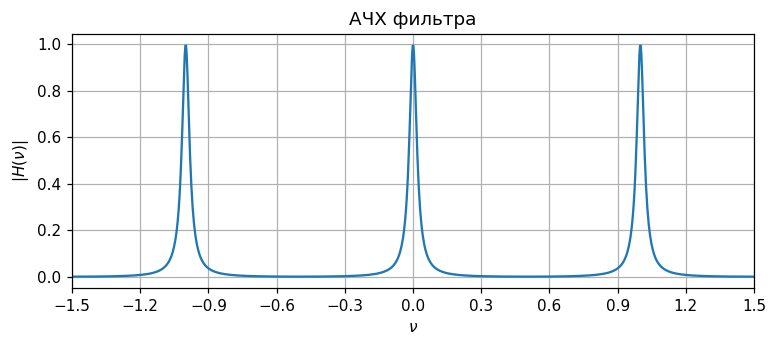

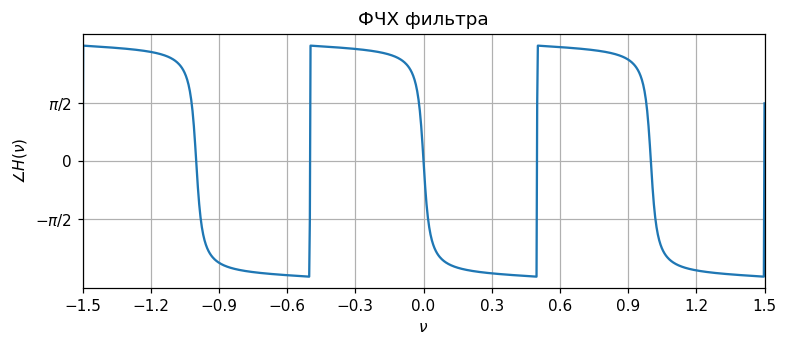

In [624]:
alpha = RC / dt
beta = (2 * alpha - 1) / (2 * alpha + 1)

b0 = b1 = b2 = 1 / (2 * alpha + 1) ** 2
b1 *= 2
a1 = - 2 * beta
a2 = beta ** 2

alphas = np.array([1, a1, a2])
betas = np.array([b0, b1, b2])

dlti_2RC = signal.dlti(betas, alphas)

t, h = dlti_2RC.impulse()
plot_impulse(t, h)

theta=np.linspace(-3 * np.pi, 3 * np.pi, 1024)
w, H = dlti_2RC.freqresp(w = theta)

plot_frequency_response(w, H, lim = 1.5)


## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

$$ RC \frac{dy}{dt} + y_1(t) = x(t), y(0) = 0 $$

$$ RC pY_1(p) + Y(p) = X(p) $$

$$ H_1(p) = \frac{Y(p)}{X(p)} = \frac{1}{1 + RCp} $$

$$ H_2(p) = H_1(p) H_1(p) = \frac{1}{(RC)^2 p^2 + 2RC p + 1} $$

$$ h_a(p) = \frac{1}{j2\pi }\oint\limits_{C}{{{H}_{2}}(p){{e}^{pt}}dp} $$

$$ h_a(p) = \frac{t}{(RC)^2} e^{-\frac{t}{RC}} $$


$$ h[k] = \alpha ^ 2 k e^{- k \alpha}, \alpha = \Delta t / RC $$

$$ H(z) = \frac{\alpha^2 e^{- \alpha} z^{-1}}{1 - 2e^{- \alpha} z^{-1} + e^{- 2\alpha} z^{-2}} $$

In [625]:
RC = 2*1e-4
dt = RC/8


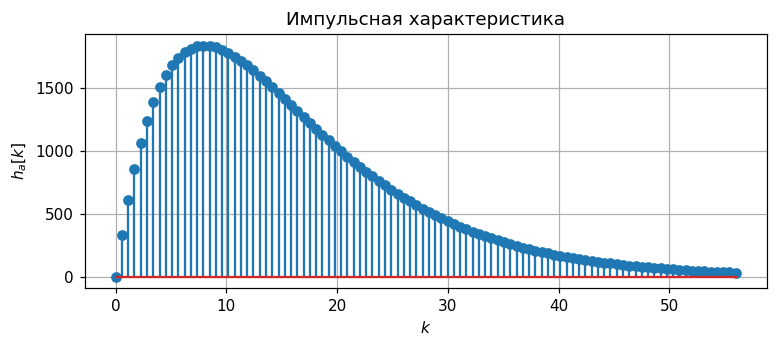

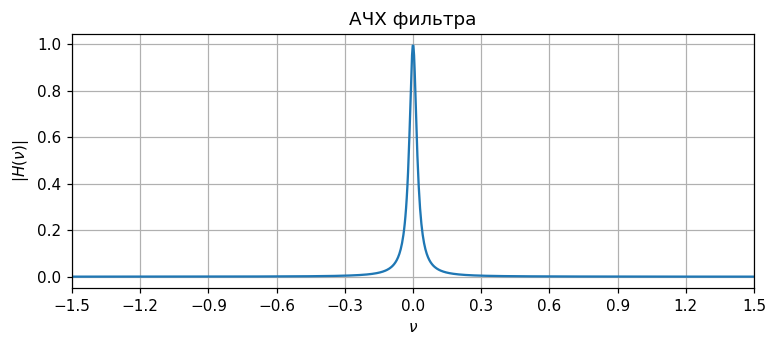

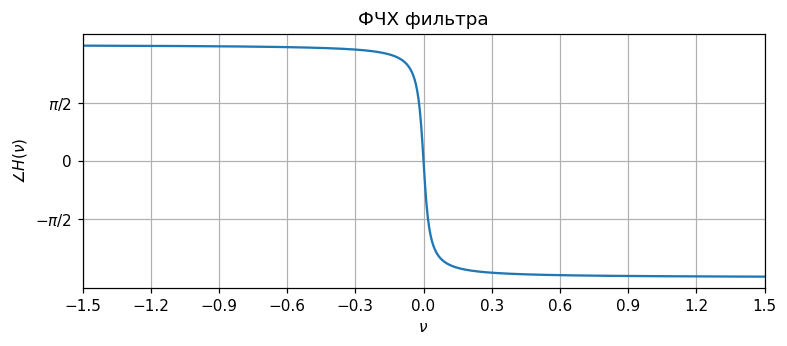

In [626]:
betas = np.array([1])
alphas = np.array([RC**2, 2*RC, 1])

lti_2RC = signal.lti(betas, alphas)

t, h = lti_2RC.impulse()
plot_impulse_a(t / dt, h)

theta = np.linspace(-3 * np.pi, 3 * np.pi, 1024) / dt
w, H = lti_2RC.freqresp(w = theta)

plot_frequency_response(w * dt, H, lim = 1.5)


/Users/panterrich/Library/Python/3.9/lib/python/site-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


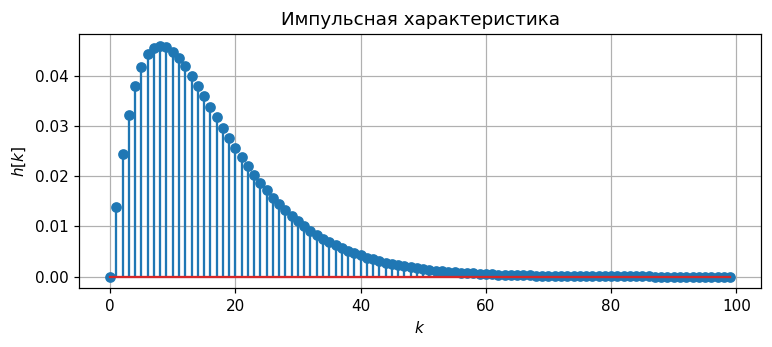

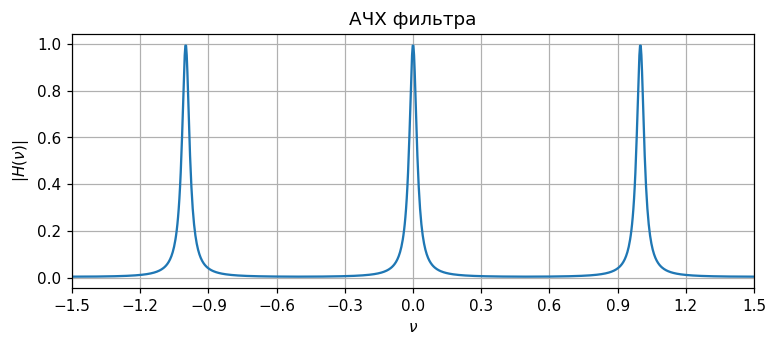

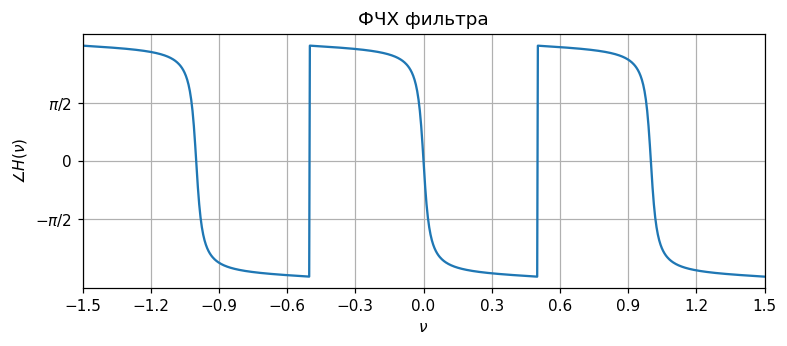

In [627]:
alpha = dt / RC

betas = np.array([0, alpha ** 2 * np.exp(-alpha), 0])
alphas = np.array([1, -2*np.exp(-alpha), np.exp(-2*alpha)])

dlti_2RC = signal.dlti(betas, alphas)

t, h = dlti_2RC.impulse()
plot_impulse(t, h)

theta=np.linspace(-3 * np.pi, 3 * np.pi, 1024)
w, H = dlti_2RC.freqresp(w = theta)

plot_frequency_response(w, H, lim = 1.5)


### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

/var/folders/r1/lnw7h2g55yq12k_m4cnlhj0h0000gn/T/ipykernel_73915/2322397723.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = scipy.io.wavfile.read(path)


44100 [ -37  -31  -37 ... -118 -124 -131]


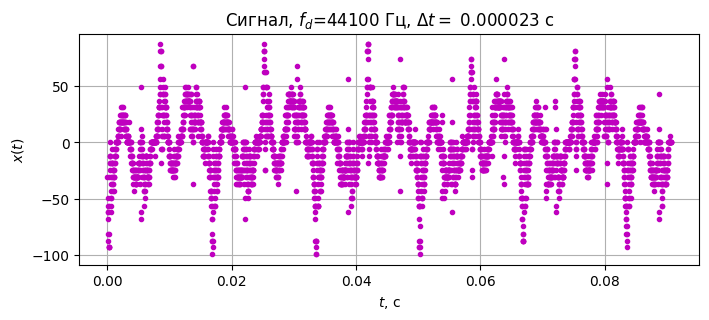

In [628]:
import scipy

path = 'lecture/wav_files/guitar.wav'

fs, x = scipy.io.wavfile.read(path)

print(fs, x)

time_duration=4000
time_delay=10000

x = x[time_delay:(time_delay+time_duration)]

plt.figure(figsize=[8, 3])
plt.plot(np.arange(x.size)/fs, x, 'm.')
plt.xlabel(u'$t$, c')
plt.ylabel(u'$x(t)$')
plt.title('Сигнал, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
plt.grid()


In [629]:
wp = 500
ws = 780
gpass = 0.4455
gstop = 40

delta1 = 1 - 10 ** (-gpass / 20)
delta2 = 10 ** (-gstop / 20)

print(delta1, delta2)


0.04999694912604835 0.01


5 499.99999999999994 [ 0.00176457 -0.00524587  0.00348159  0.00348159 -0.00524587  0.00176457] [ 1.         -4.90806517  9.64331997 -9.48098738  4.66430164 -0.91856849]


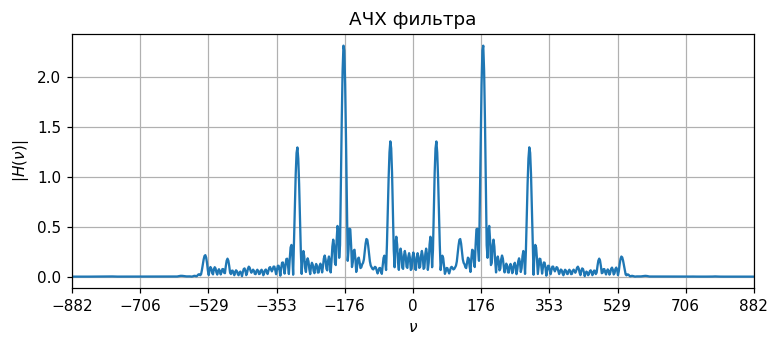

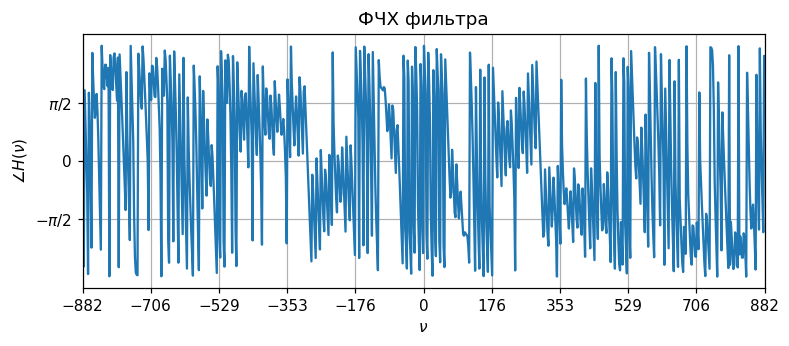

20000


In [630]:
N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn = Wn, btype='lowpass', analog=False, output='ba', fs=fs)

print(N, Wn, beta, alpha)

system = signal.dlti(beta, alpha)

M = 20000
theta=np.linspace(-np.pi, np.pi, M)
w, H1 = system.freqresp(w = theta)

H2 = np.fft.fftshift(np.fft.fft(x, M)) / M

plot_frequency_response(theta * fs, H1 * H2, lim=0.02 * fs)

y = np.fft.ifft(H2)

print(y.size)
y = y[:4000]


# plot_freq_response_filter(Wn, beta, alpha)


# plt.figure(figsize=[8, 3])
# plt.plot(np.arange(y.size)/fs, y, 'm.')
# plt.xlabel(u'$t$, c')
# plt.ylabel(u'$y(t)$')
# plt.title('Сигнал, $f_d$=%i Гц, $\Delta t=$ %f c' %(fs, 1.0/fs))
# plt.grid()
